In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
from env import host, user, password

In [4]:
telco_m2m_churn = pd.read_csv('churn_m2m.csv')

In [5]:
telco_m2m_churn

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_VLookup,internet_service,internet_service_VLookup,contract_type,...,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,monthly_charges.1
0,5287-QWLKY,Male,1,Yes,Yes,2,Two or More Lines,2,Fiber Optic,0,...,Yes,71.818268,False,True,True,True,True,3,NaN,$105.10
1,5502-RLUYV,Female,0,Yes,Yes,2,Two or More Lines,2,Fiber Optic,0,...,Yes,71.639250,True,True,True,True,True,3,NaN,$103.95
2,0979-PHULV,Male,0,Yes,Yes,2,Two or More Lines,2,Fiber Optic,0,...,Yes,70.463550,False,True,True,True,True,3,NaN,$99.45
3,9090-SGQXL,Male,1,Yes,No,2,Two or More Lines,2,Fiber Optic,0,...,Yes,69.322412,False,True,True,True,True,1,NaN,$105.30
4,4550-VBOFE,Male,1,Yes,No,2,Two or More Lines,2,Fiber Optic,0,...,Yes,68.980087,False,True,True,True,True,1,NaN,$102.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,9894-EZEWG,Female,0,No,No,1,One Line,2,Fiber Optic,0,...,Yes,1.000000,True,True,True,True,True,0,NaN,$74.30
1652,9907-SWKKF,Female,1,No,No,0,No Phone Service,1,DSL,0,...,Yes,1.000000,True,True,False,True,False,0,NaN,$25.05
1653,9940-RHLFB,Female,0,No,No,1,One Line,2,Fiber Optic,0,...,Yes,1.000000,True,True,True,True,True,0,NaN,$75.30
1654,9974-JFBHQ,Female,0,Yes,Yes,0,No Phone Service,1,DSL,0,...,Yes,1.000000,True,True,False,True,False,3,NaN,$30.50


In [8]:
telco_m2m_churn .groupby('is_senior_citizen').describe()

phone_service                                               \
                          count      mean       std  min  25%  50%  75%  max   
is_senior_citizen                                                              
0                        1215.0  1.293827  0.626241  0.0  1.0  1.0  2.0  2.0   
1                         441.0  1.478458  0.664087  0.0  1.0  2.0  2.0  2.0   

                  internet_service            ...     tenure             \
                             count      mean  ...        75%        max   
is_senior_citizen                             ...                         
0                           1215.0  1.576132  ...  17.284481  71.639250   
1                            441.0  1.823129  ...  29.694288  71.818268   

                  start_date                               
                       count mean std min 25% 50% 75% max  
is_senior_citizen                                          
0                        0.0  NaN NaN NaN NaN NaN NaN NaN  
1                        0.0  NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 40 columns]

In [9]:
telco = pd.read_csv('all_data_telco.csv')

In [10]:
telco

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_VLookup,internet_service,internet_service_VLookup,contract_type,...,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,monthly_charges.1
0,5893-KCLGT,Female,0.0,No,Yes,1.0,One Line,0.0,No Internet Service,2.0,...,No,79.341772,True,False,True,False,False,FALSE,NaN,$19.75
1,7083-MIOPC,Female,0.0,No,No,1.0,One Line,0.0,No Internet Service,2.0,...,No,77.377778,True,False,True,False,False,0,NaN,$20.25
2,8207-VVMYB,Female,0.0,Yes,No,2.0,Two or More Lines,0.0,No Internet Service,2.0,...,No,77.190385,True,False,True,False,False,1,NaN,$26.00
3,6010-DDPPW,Male,0.0,Yes,No,2.0,Two or More Lines,0.0,No Internet Service,2.0,...,No,77.170974,False,False,True,False,False,1,NaN,$25.15
4,3910-MRQOY,Female,0.0,Yes,No,1.0,One Line,0.0,No Internet Service,2.0,...,No,77.136598,True,False,True,False,False,1,NaN,$19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,9907-SWKKF,Female,1.0,No,No,0.0,No Phone Service,1.0,DSL,0.0,...,Yes,1.000000,True,True,False,True,False,0,NaN,$25.05
7046,9940-RHLFB,Female,0.0,No,No,1.0,One Line,2.0,Fiber Optic,0.0,...,Yes,1.000000,True,True,True,True,True,0,NaN,$75.30
7047,9974-JFBHQ,Female,0.0,Yes,Yes,0.0,No Phone Service,1.0,DSL,0.0,...,Yes,1.000000,True,True,False,True,False,3,NaN,$30.50
7048,9995-HOTOH,Female,0.0,No,No,1.0,One Line,2.0,Fiber Optic,0.0,...,Yes,1.000000,True,True,True,True,True,0,NaN,$70.15


In [14]:
telco_churn = telco.groupby('churn')
telco_churn.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_VLookup,internet_service,internet_service_VLookup,contract_type,...,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,monthly_charges.1
0,5893-KCLGT,Female,0.0,No,Yes,1.0,One Line,0.0,No Internet Service,2.0,...,No,79.341772,True,False,True,False,False,FALSE,NaN,$19.75
1,7083-MIOPC,Female,0.0,No,No,1.0,One Line,0.0,No Internet Service,2.0,...,No,77.377778,True,False,True,False,False,0,NaN,$20.25
2,8207-VVMYB,Female,0.0,Yes,No,2.0,Two or More Lines,0.0,No Internet Service,2.0,...,No,77.190385,True,False,True,False,False,1,NaN,$26.00
3,6010-DDPPW,Male,0.0,Yes,No,2.0,Two or More Lines,0.0,No Internet Service,2.0,...,No,77.170974,False,False,True,False,False,1,NaN,$25.15
4,3910-MRQOY,Female,0.0,Yes,No,1.0,One Line,0.0,No Internet Service,2.0,...,No,77.136598,True,False,True,False,False,1,NaN,$19.40
5179,3886-CERTZ,Female,0.0,Yes,No,2.0,Two or More Lines,2.0,Fiber Optic,1.0,...,Yes,74.231579,True,True,True,True,True,1,NaN,$109.25
5180,0917-EZOLA,Male,1.0,Yes,No,2.0,Two or More Lines,2.0,Fiber Optic,2.0,...,Yes,73.835334,False,True,True,True,True,1,NaN,$104.15
5181,2889-FPWRM,Male,0.0,Yes,No,2.0,Two or More Lines,2.0,Fiber Optic,1.0,...,Yes,73.724958,False,True,True,True,True,1,NaN,$117.80
5182,3512-IZIKN,Female,0.0,Yes,No,2.0,Two or More Lines,1.0,DSL,2.0,...,Yes,72.890505,True,True,True,True,True,1,NaN,$65.30
5183,3259-FDWOY,Male,0.0,Yes,Yes,2.0,Two or More Lines,2.0,Fiber Optic,2.0,...,Yes,72.865094,False,True,True,True,True,3,NaN,$106.00


In [18]:
senior = telco['is_senior_citizen'].value_counts()
senior

0.0    5907
1.0    1142
Name: is_senior_citizen, dtype: int64

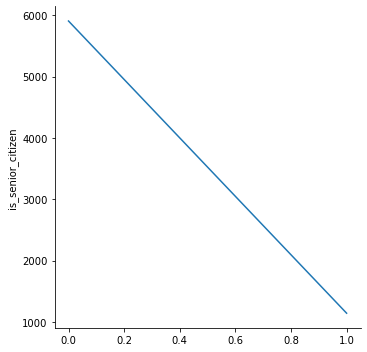

In [24]:
sns.relplot(data = senior, kind='line')

In [20]:
churn = telco['churn'].value_counts()
churn

No     5179
Yes    1870
Name: churn, dtype: int64

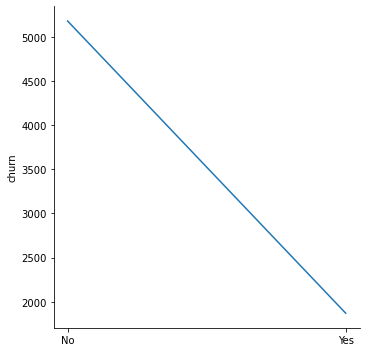

In [25]:
sns.relplot(data = churn, kind='line')